Amortization Schedule (First 12 Months):
    Month  Payment  Interest  Principal  Remaining Balance
0       1  1073.64    833.33     240.31          200000.00
1       2  1073.64    832.33     241.31          199759.69
2       3  1073.64    831.33     242.32          199518.38
3       4  1073.64    830.32     243.33          199276.06
4       5  1073.64    829.30     244.34          199032.74
5       6  1073.64    828.28     245.36          198788.40
6       7  1073.64    827.26     246.38          198543.04
7       8  1073.64    826.24     247.41          198296.66
8       9  1073.64    825.21     248.44          198049.25
9      10  1073.64    824.17     249.47          197800.81
10     11  1073.64    823.13     250.51          197551.34
11     12  1073.64    822.09     251.56          197300.83

Loan Summary:
Principal (Amount Borrowed): $200,000.00
Monthly Payment: $1,073.64
Total Payments: $386,511.57
Total Interest Paid: $186,511.64


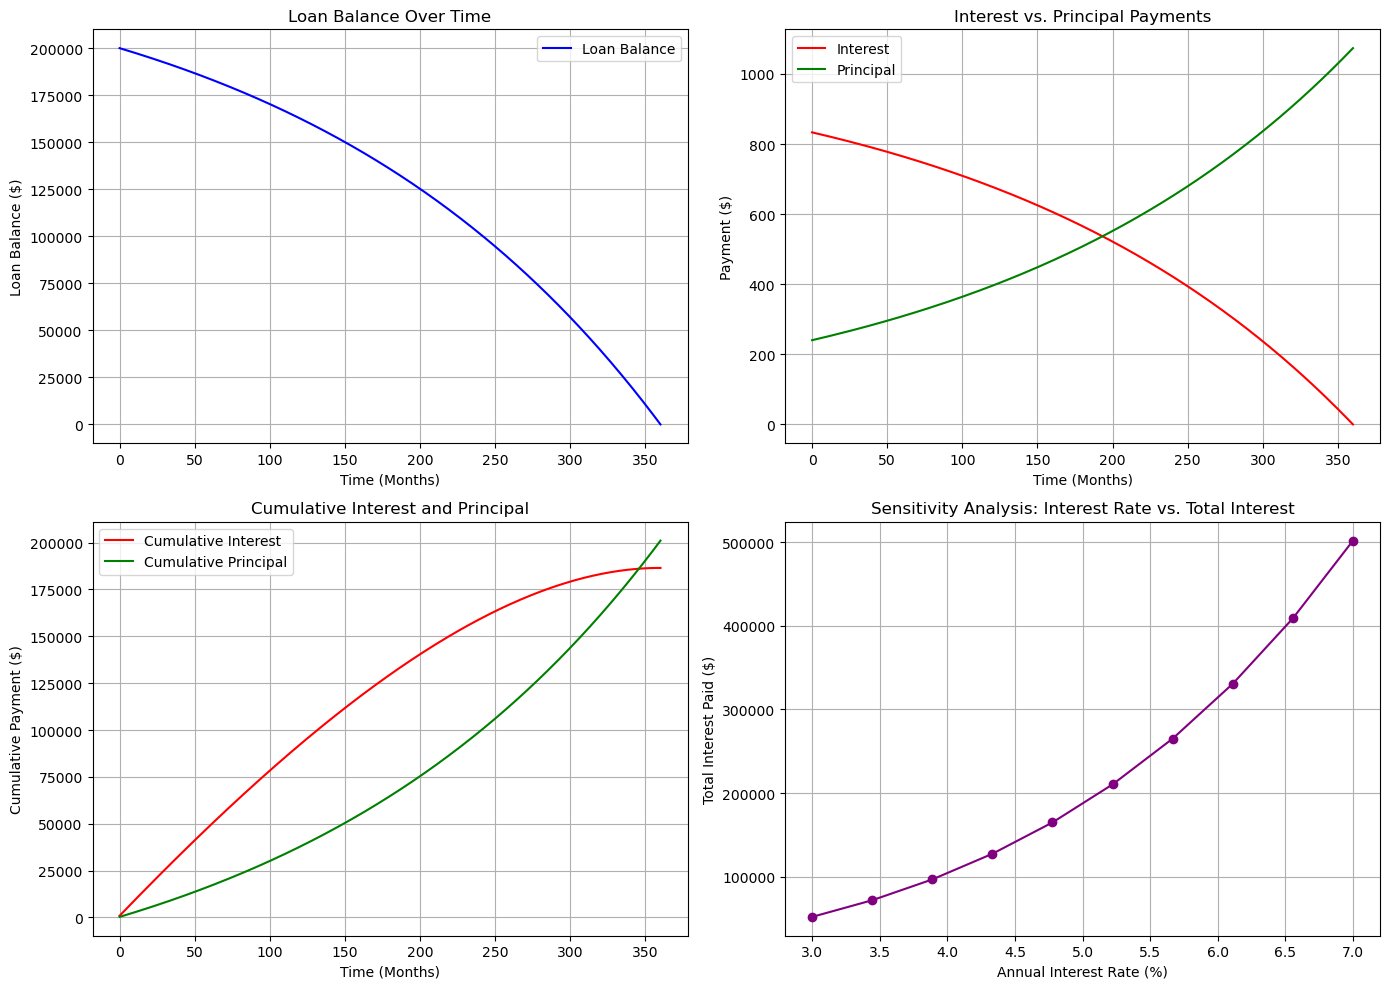

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
B0 = 200000  # Initial loan balance
r = 0.05 / 12  # Monthly interest rate (5% annual)
T = 30 * 12  # Loan term in months

# Calculate the monthly payment P using the loan amortization formula
P = (r * B0) / (1 - (1 + r)**(-T))

# Discretization
dt = 1  # Time step (1 month)
N = int(T / dt)  # Number of time steps

# Initialize arrays
t = np.arange(0, T + dt, dt)  # Time array
B = np.zeros(len(t))  # Loan balance array
B[0] = B0  # Initial condition

# Euler's method
for k in range(len(t) - 1):
    dB_dt = r * B[k] - P  # Derivative (no prepayments or fees in this example)
    B[k + 1] = B[k] + dt * dB_dt  # Update rule

# Generate amortization schedule
schedule = []
for month in range(len(t)):
    interest = r * B[month]
    principal = P - interest
    schedule.append({
        "Month": month + 1,
        "Payment": round(P, 2),  # Constant monthly payment (rounded to 2 decimal places)
        "Interest": round(interest, 2),  # Interest rounded to 2 decimal places
        "Principal": round(principal, 2),  # Principal rounded to 2 decimal places
        "Remaining Balance": round(B[month], 2)  # Remaining balance rounded to 2 decimal places
    })

# Convert to DataFrame
schedule_df = pd.DataFrame(schedule)

# Set display options to show 2 decimal places for all float values
pd.set_option('display.float_format', '{:.2f}'.format)

# Display first 12 months
print("Amortization Schedule (First 12 Months):")
print(schedule_df.head(12))

# Calculate total payments and total interest
total_payments = P * T  # Total payments over the life of the loan
total_interest = schedule_df["Interest"].sum()  # Total interest paid

print("\nLoan Summary:")
print(f"Principal (Amount Borrowed): ${B0:,.2f}")
print(f"Monthly Payment: ${P:,.2f}")
print(f"Total Payments: ${total_payments:,.2f}")
print(f"Total Interest Paid: ${total_interest:,.2f}")

# Visualization
plt.figure(figsize=(14, 10))

# Plot 1: Loan Balance Over Time
plt.subplot(2, 2, 1)
plt.plot(t, B, label="Loan Balance", color="blue")
plt.xlabel("Time (Months)")
plt.ylabel("Loan Balance ($)")
plt.title("Loan Balance Over Time")
plt.grid()
plt.legend()

# Plot 2: Interest vs. Principal Payments
plt.subplot(2, 2, 2)
plt.plot(t, schedule_df["Interest"], label="Interest", color="red")
plt.plot(t, schedule_df["Principal"], label="Principal", color="green")
plt.xlabel("Time (Months)")
plt.ylabel("Payment ($)")
plt.title("Interest vs. Principal Payments")
plt.grid()
plt.legend()

# Plot 3: Cumulative Interest and Principal
plt.subplot(2, 2, 3)
cumulative_interest = schedule_df["Interest"].cumsum()
cumulative_principal = schedule_df["Principal"].cumsum()
plt.plot(t, cumulative_interest, label="Cumulative Interest", color="red")
plt.plot(t, cumulative_principal, label="Cumulative Principal", color="green")
plt.xlabel("Time (Months)")
plt.ylabel("Cumulative Payment ($)")
plt.title("Cumulative Interest and Principal")
plt.grid()
plt.legend()

# Plot 4: Sensitivity Analysis (Interest Rate vs. Total Interest)
interest_rates = np.linspace(0.03 / 12, 0.07 / 12, 10)  # Vary interest rate from 3% to 7%
total_interests = []
for rate in interest_rates:
    B_temp = np.zeros(len(t))
    B_temp[0] = B0
    for k in range(len(t) - 1):
        dB_dt = rate * B_temp[k] - P
        B_temp[k + 1] = B_temp[k] + dt * dB_dt
    total_interests.append(np.sum(rate * B_temp))

plt.subplot(2, 2, 4)
plt.plot(interest_rates * 12 * 100, total_interests, marker="o", color="purple")
plt.xlabel("Annual Interest Rate (%)")
plt.ylabel("Total Interest Paid ($)")
plt.title("Sensitivity Analysis: Interest Rate vs. Total Interest")
plt.grid()

plt.tight_layout()
plt.show()